In [1]:
from create_data import *

# Get the data
data = load_data("output", ["EPL"])
EPL_data = data["EPL"]

Loading data for EPL from ['2014', '2022', '2023', '2015', '2017', '2019', '2021', '2020', '2018', '2016']
Loading data for EPL from 2014
<class 'str'> team_name Chelsea
<class 'str'> player_name Isaiah_Brown
output/EPL 2014 Chelsea Isaiah_Brown
<class 'str'> team_name Chelsea
<class 'str'> player_name Nathan_Aké
output/EPL 2014 Chelsea Nathan_Aké
<class 'str'> team_name Chelsea
<class 'str'> player_name Willian
output/EPL 2014 Chelsea Willian
<class 'str'> team_name Chelsea
<class 'str'> player_name Ramires
output/EPL 2014 Chelsea Ramires
<class 'str'> team_name Chelsea
<class 'str'> player_name Filipe_Luis
output/EPL 2014 Chelsea Filipe_Luis
<class 'str'> team_name Chelsea
<class 'str'> player_name Loïc_Remy
output/EPL 2014 Chelsea Loïc_Remy
<class 'str'> team_name Chelsea
<class 'str'> player_name André_Schürrle
output/EPL 2014 Chelsea André_Schürrle
<class 'str'> team_name Chelsea
<class 'str'> player_name Cesc_Fàbregas
output/EPL 2014 Chelsea Cesc_Fàbregas
<class 'str'> team_name 

In [11]:
EPL_data = data["EPL"]

In [7]:
EPL_data["2021"]["matches"][0]["shots"].keys()

Index(['Team', 'Minute', 'Result', 'X', 'Y', 'xG', 'Player', 'Home/Away',
       'Player ID', 'Situation', 'Season', 'Shot Type', 'Match ID',
       'Home Team', 'Away Team', 'Home Goals', 'Away Goals', 'Date',
       'Player Assisted', 'Last Action'],
      dtype='object')

In [ ]:
# EPL_data["2021"]["matches"][0]["shots"].keys()
# Index(['Team', 'Minute', 'Result', 'X', 'Y', 'xG', 'Player', 'Home/Away',
#  'Player ID', 'Situation', 'Season', 'Shot Type', 'Match ID',
#  'Home Team', 'Away Team', 'Home Goals', 'Away Goals', 'Date',
#  'Player Assisted', 'Last Action'],
# dtype='object')

In [16]:
type(EPL_data["2021"]["matches"])

list

In [1]:
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import numpy as np

In [72]:
PITCH_WIDTH = 68
PITCH_HEIGHT = 105

pitch = VerticalPitch(
    pitch_type="custom",
    pitch_width=PITCH_WIDTH,
    pitch_length=PITCH_HEIGHT,
    half=True,
    line_zorder=2,
)

dict_keys(['match_id', 'rosters', 'shots'])

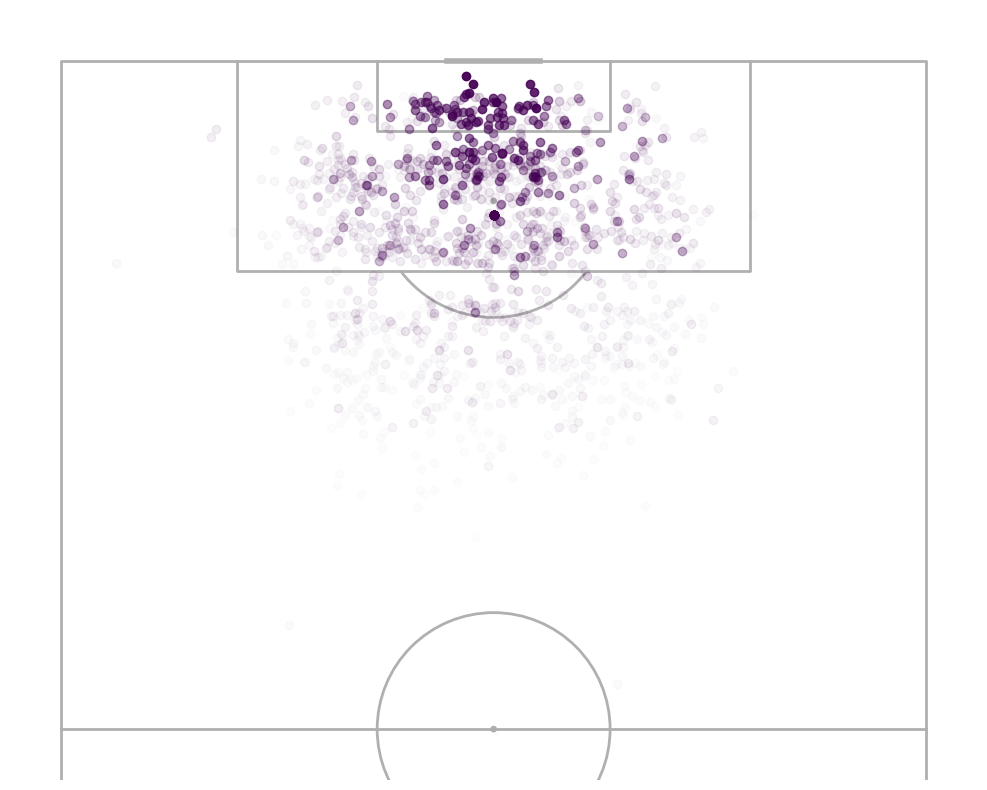

In [45]:
fig, ax = plt.subplots(figsize=(20, 10))
pitch.draw(ax=ax)
for match in EPL_data["2023"]["matches"][:50]:
    # match["shots"] is pd.DataFrame
    for shot_i in range(len(match["shots"])):
        shot = match["shots"].iloc[shot_i]
        x = shot["X"]
        y = shot["Y"]
        xG = shot["xG"]

        # if shot["Team"] == "a":
        # x = 1-x
        # y = 1-y

        ax.scatter(
            y * PITCH_WIDTH, x * PITCH_HEIGHT, 
            c=xG,
            # s=xG * 10,
            alpha=xG
        )

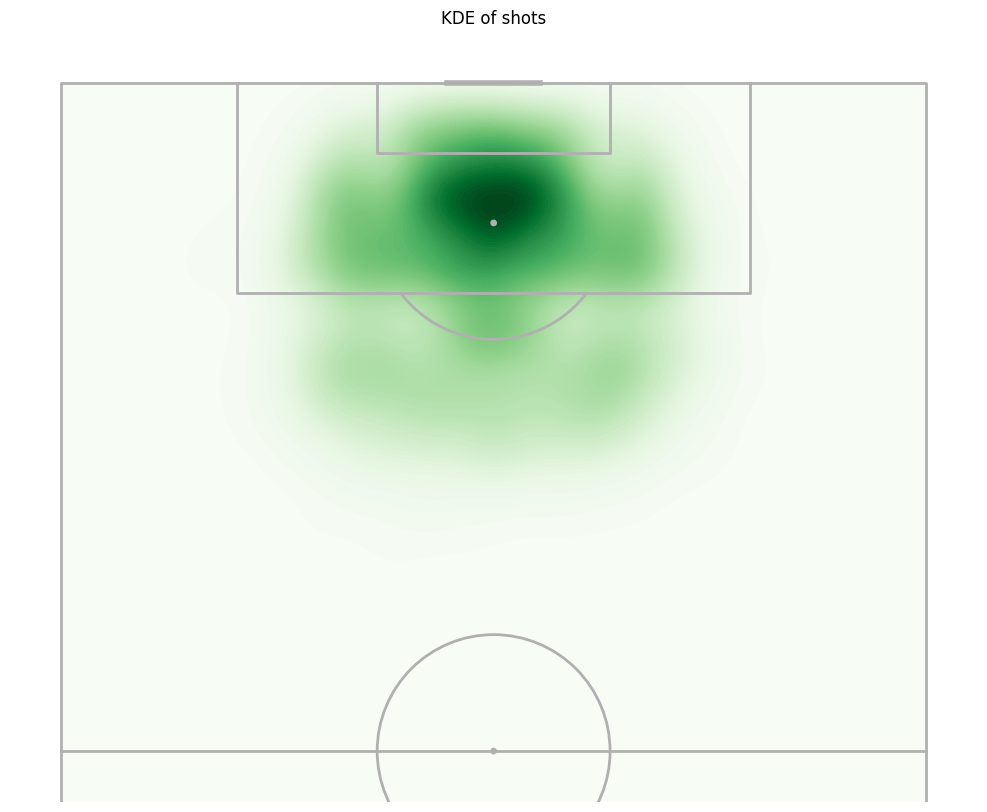

In [76]:
fig, ax = plt.subplots(figsize=(20, 10))
pitch.draw(ax=ax)

shots_df = pd.concat([
    match["shots"] for match in EPL_data["2023"]["matches"]
])

kde = pitch.kdeplot(
    shots_df["X"] * PITCH_HEIGHT,
    shots_df["Y"] * PITCH_WIDTH,
    ax=ax,
    cmap="Greens",
    fill=True,
    levels=100,
    thresh=0,
    cut=4,
)

_ = ax.set_title("KDE of shots")

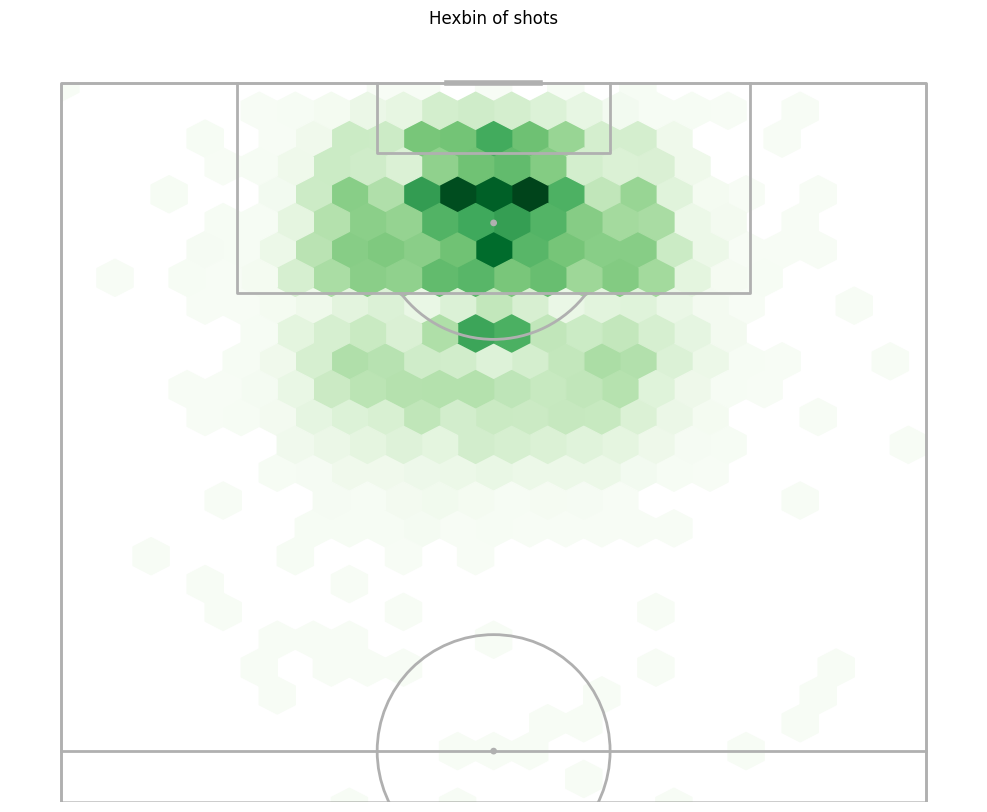

In [85]:
fig, ax = plt.subplots(figsize=(20, 10))
pitch.draw(ax=ax)

shots_df = pd.concat([match["shots"] for match in EPL_data["2023"]["matches"]])

kde = pitch.hexbin(
    shots_df["X"] * PITCH_HEIGHT,
    shots_df["Y"] * PITCH_WIDTH,
    ax=ax,
    cmap="Greens",
    gridsize=(24, 24),
)

_ = ax.set_title("Hexbin of shots")

In [52]:
EPL_data["2022"]["data"].keys()

Index(['Match ID', 'Date', 'Home', 'Home Short', 'Away', 'Away Short',
       'Home Goals', 'Away Goals', 'Home xG', 'Away xG'],
      dtype='object')

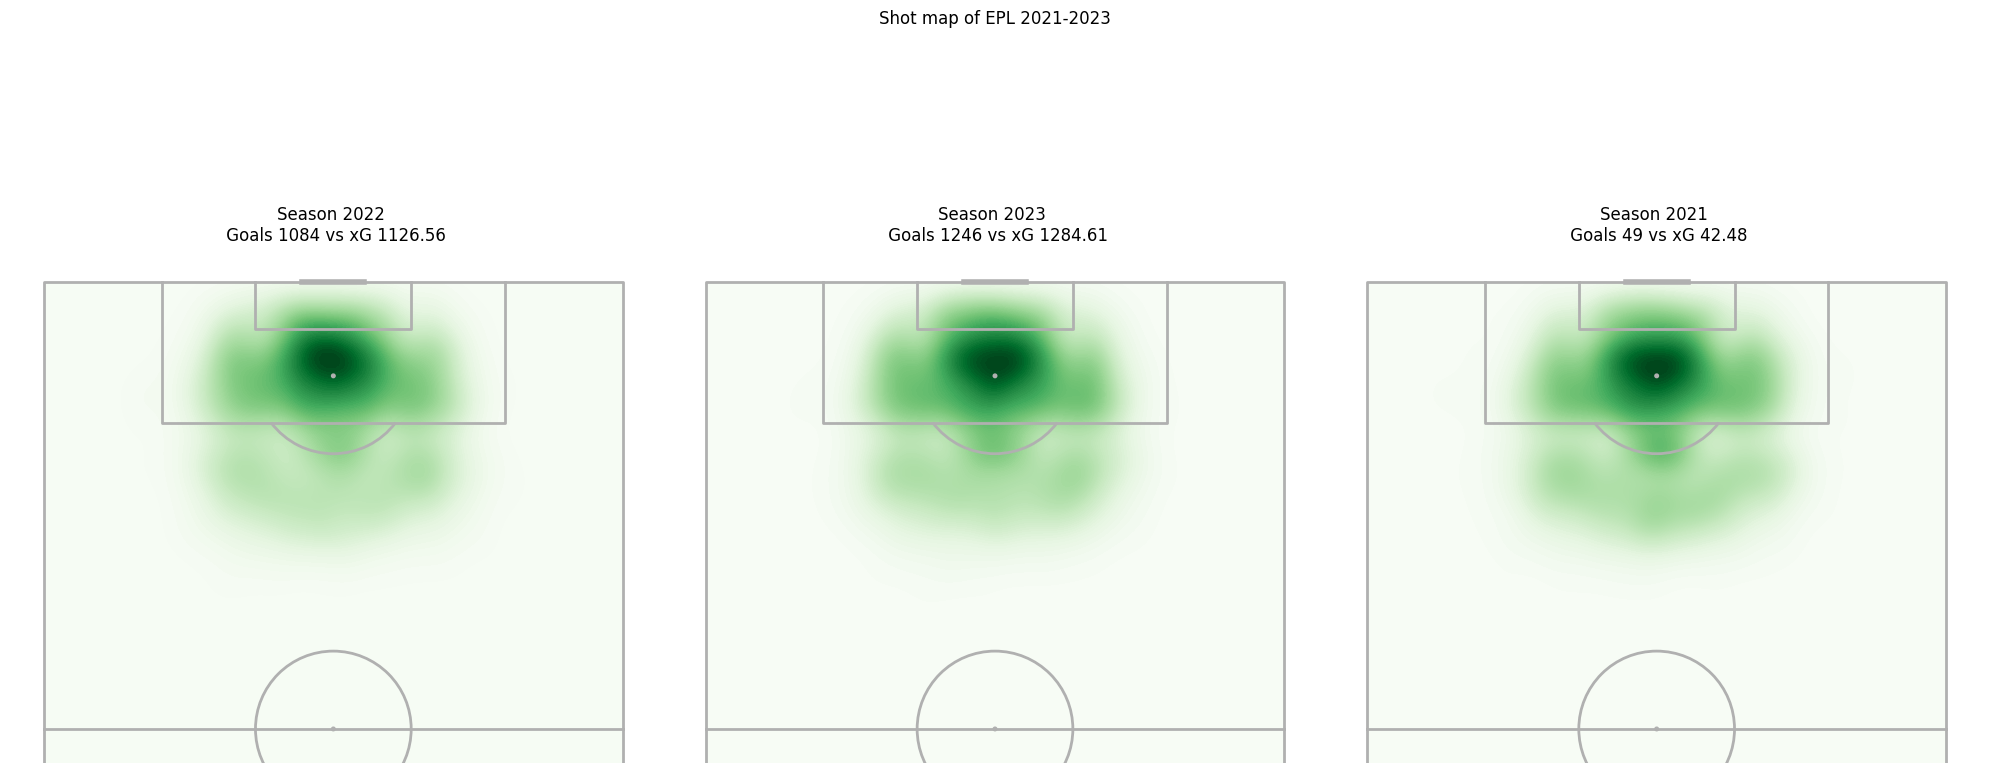

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

years = EPL_data.keys()

for i in range(3):
    pitch.draw(ax=axs[i])

    shots_df = pd.concat(
        [match["shots"] for match in EPL_data[list(years)[i]]["matches"]]
    )

    kde = pitch.kdeplot(
        shots_df["X"] * PITCH_HEIGHT,
        shots_df["Y"] * PITCH_WIDTH,
        ax=axs[i],
        cmap="Greens",
        fill=True,
        levels=100,
        thresh=0,
        cut=4,
    )

    goal_count = EPL_data[list(years)[i]]["data"]["Home Goals"].sum() + EPL_data[list(years)[i]]["data"]["Away Goals"].sum()
    xG_sum = EPL_data[list(years)[i]]["data"]["Home xG"].sum() + EPL_data[list(years)[i]]["data"]["Away xG"].sum()

    axs[i].set_title(f"Season {list(years)[i]} \n Goals {goal_count} vs xG {xG_sum:.2f}")

fig.suptitle(f"Shot map of EPL 2021-2023")
fig.tight_layout()

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

years = EPL_data.keys()

# print ammount of shots in each year
for year in years:
    shot_count = 0
    for match in EPL_data[year]["matches"]:
        shot_count += len(match["shots"])
    print(f"Year: {year}, shots: {shot_count}")

for i in range(3):
    pitch.draw(ax=axs[i])
    # xG_sum = 0
    for match in EPL_data[list(years)[i]]["matches"]:
        # match["shots"] is pd.DataFrame
        for shot_i in range(len(match["shots"])):
            shot = match["shots"].iloc[shot_i]
            x = shot["X"]
            y = shot["Y"]
            xG = shot["xG"]

            # if shot["Team"] == "a":
            # x = 1-x
            # y = 1-y

            axs[i].scatter(
                y * PITCH_WIDTH,
                x * PITCH_HEIGHT,
                c=xG,
                s=xG * 10,
                alpha=xG,
            )

        # xG_sum += match["shots"]["xG"].sum()

    goal_count = (
        EPL_data[list(years)[i]]["data"]["Home Goals"].sum()
        + EPL_data[list(years)[i]]["data"]["Away Goals"].sum()
    )
    xG_sum = (
        EPL_data[list(years)[i]]["data"]["Home xG"].sum()
        + EPL_data[list(years)[i]]["data"]["Away xG"].sum()
    )

    axs[i].set_title(
        f"Season {list(years)[i]} \n Goals {goal_count} vs xG {xG_sum:.2f}"
    )

fig.suptitle(f"Shot map of EPL 2021-2023")
fig.tight_layout()

plt.show()